In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
with open('url_list.txt') as f:
    lines = f.readlines()
print('Total Records:\t', len(lines))

Total Records:	 77677


# Q1
Create a clean data set where each column is a field in the URL, each row is a given
search and the cells are the corresponding URL values.|

In [76]:
length = len(lines)
names = ['checkin', 'checkout', 'customMinimumPriceFilter', 
            'customMaximumPriceFilter', 'freeCancellation', 'stars_5', 
            'stars_4', 'stars_3', 'stars_2', 'stars_1', 'max_score', 
            'min_score', 'couponCode', 'adults', 'city', 'children', 
            'amenities', 'search_page']
    
maps = {}
for name in names:
    maps[name] = [np.nan] * length

for i in range(length):
    cur_url = lines[i]
    cur_url = cur_url.split('?')[1].split('&')
    for j in cur_url:
        j = j.split('.')[1].split('=')
        if j[0] == 'amenities':
            print(j)
        if j[0] == 'city':
            j[1] = j[1].replace('+', ' ')
        elif j[0] == 'search_page':
            j[1] = j[1].replace('\n', '')
        maps[j[0]][i] = j[1]

['amenities', 'yes_smoking']
['amenities', 'shuttle']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'internet']
['amenities', 'shuttle']
['amenities', 'internet']
['amenities', 'internet']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'internet']
['amenities', 'internet']
['amenities', 'internet']
['amenities', 'shuttle']
['amenities', 'shuttle']
['amenities', 'shuttle']
['amenities', 'shuttle']
['amenities', 'internet']
['amenities', 'yes_smoking']
['amenities', 'internet']
['amenities', 'internet']
['amenities', 'yes_smoking']
['amenities', 'internet']
['amenities', 'internet']
['amenities', 'internet']
['amenities', 'internet']
['amenities', 'inte

['amenities', 'internet']
['amenities', 'internet']
['amenities', 'shuttle']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'yes_smoking']
['amenities', 'internet']
['amenities', 'internet']
['amenities', 'shuttle']
['amenities', 'shuttle']
['amenities', 'internet']
['amenities', 'internet']
['amenities', 'lounge']
['amenities', 'internet']
['amenities', 'lounge']
['amenities', 'shuttle']
['amenities', 'breakfast']
['amenities', 'breakfast']
['amenities', 'shuttle']
['amenities', 'breakfast']
['amenities', 'internet']
['amenities', 'internet']
['amenities', 'internet']
['amenities', 'internet']
['amenities', 'yes_pet']
['amenities', 'internet']
['amenities', 'yes_pet']
['amenities', 'internet']
['amenities', 'breakfast']
['amenities', 'breakfast']
['amenities', 'internet']
['amenities', 'shuttle']
['amenities', 'shuttle']
['amenities', 'shuttle']
['amenities', 'shuttle']
['am

In [55]:
df = pd.DataFrame(maps, columns=names)
df['checkin'] = pd.to_datetime(df['checkin'])
df['checkout'] = pd.to_datetime(df['checkout'])
df = df.rename(columns={'customMinimumPriceFilter': 'MinPrice', 
                         'customMaximumPriceFilter': 'MaxPrice'})
df

,checkin,checkout,MinPrice,MaxPrice,freeCancellation,stars_5,stars_4,stars_3,stars_2,stars_1,max_score,min_score,couponCode,adults,city,children,amenities,search_page
0,2015-09-19,2015-09-20,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,4,NaN,3,"New York, NY, United States",NaN,NaN,1
1,2015-09-14,2015-09-15,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,4,NaN,3,"London, United Kingdom",NaN,NaN,1
2,2015-09-26,2015-09-27,NaN,175,NaN,NaN,yes,NaN,NaN,NaN,NaN,5,NaN,2,"New York, NY, United States",NaN,NaN,1
3,2015-09-02,2015-09-03,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,4,NaN,1,"Hong Kong, Hong Kong",NaN,NaN,1
4,2015-09-20,2015-09-29,NaN,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,3,"London, United Kingdom",NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77672,2015-09-06,2015-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1,"London, United Kingdom",NaN,NaN,2
77673,2015-09-06,2015-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1,"London, United Kingdom",NaN,NaN,3
77674,2015-09-06,2015-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1,"London, United Kingdom",NaN,NaN,4
77675,2015-09-18,2015-09-20,NaN,125,NaN,NaN,NaN,yes,NaN,NaN,NaN,4,NaN,1,"San Francisco, California, United States",NaN,NaN,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77677 entries, 0 to 77676
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   checkin           77677 non-null  datetime64[ns]
 1   checkout          77677 non-null  datetime64[ns]
 2   MinPrice          1270 non-null   object        
 3   MaxPrice          49288 non-null  object        
 4   freeCancellation  17949 non-null  object        
 5   stars_5           4303 non-null   object        
 6   stars_4           12704 non-null  object        
 7   stars_3           14862 non-null  object        
 8   stars_2           9931 non-null   object        
 9   stars_1           9323 non-null   object        
 10  max_score         5517 non-null   object        
 11  min_score         60826 non-null  object        
 12  couponCode        2221 non-null   object        
 13  adults            77677 non-null  object        
 14  city              7767

In [70]:
missing = df.isnull().sum().reset_index()
missing = missing.rename(columns={'index': 'name', 0: 'missing'})
missing['percent'] = missing['missing'] / len(df) * 100
missing[missing['missing'] > 0]

,name,missing,percent
2,MinPrice,76407,98.365024
3,MaxPrice,28389,36.547498
4,freeCancellation,59728,76.892774
5,stars_5,73374,94.460394
6,stars_4,64973,83.645094
7,stars_3,62815,80.866923
8,stars_2,67746,87.215006
9,stars_1,68354,87.997734
10,max_score,72160,92.897511
11,min_score,16851,21.693680


# Q2
For each search query, how many amenities were selected?

In [61]:
df['amenities'].value_counts()

internet       272
yes_smoking    170
shuttle        111
yes_pet         90
breakfast       39
lounge          22
Name: amenities, dtype: int64

In [73]:
df['amenities_count'] = df['amenities'].apply(lambda x: 0 if pd.isnull(x) 
                                                  else len(x.split(', ')))
df['amenities_count'].value_counts()

0    76973
1      704
Name: amenities_count, dtype: int64

# Q3
Often, to measure the quality of a search algorithm, data scientists use some metric
based on how often users click on the second page, third page, and so on. The idea here
is that a great search algorithm should return all interesting results on the first page and
never force users to visit the other pages (how often do you click on the second page
52
Click here to check out our site if interested in a feedback on your solutions, 1:1 mentorship, and more!
results when you search on Google? Almost never, right?).

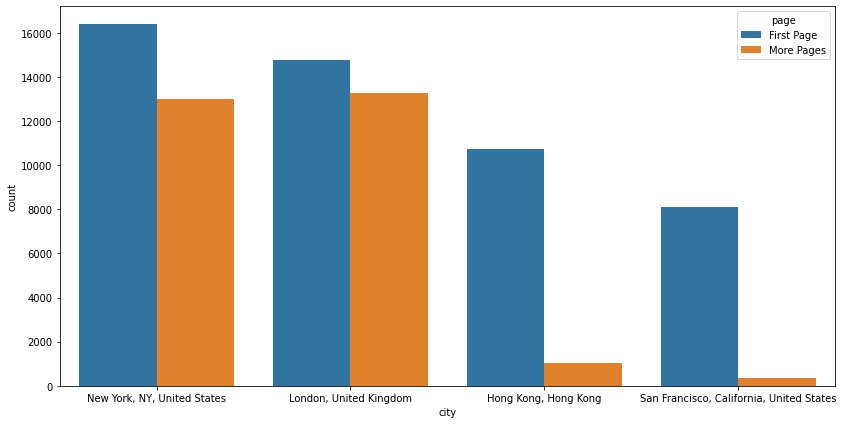

In [88]:
df['page'] = df['search_page'].apply(lambda x: 'First Page' if x == '1' else 'More Pages')
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='city', hue='page', data=df, ax=ax)
plt.tight_layout()
plt.show()

In [91]:
grouped = df.groupby(['city', 'page'])['checkin'].count().unstack()
grouped['ratio'] = grouped['More Pages'] / (grouped['First Page'] + grouped['More Pages'])

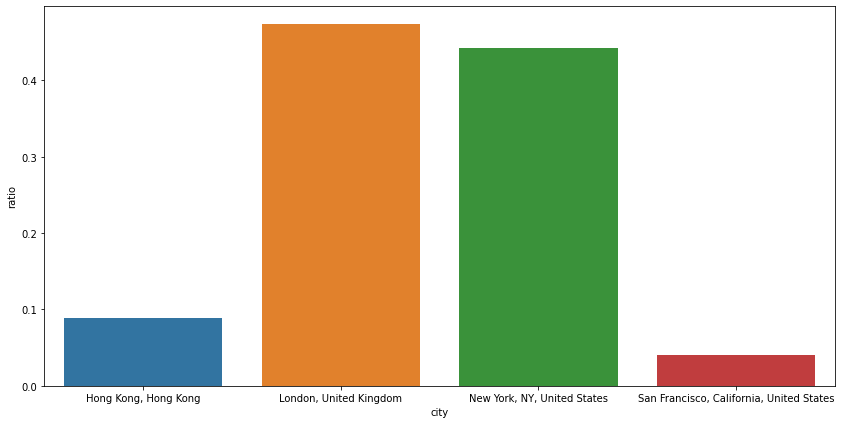

In [98]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=grouped.index, y='ratio', data=grouped, ax=ax)
plt.tight_layout()
plt.show()

Ratio of user who browser other than only the first pages shows us the London and New York has the highest ratio, and in my opinio, those two citys has the bad search algorithms among the 4 cities in our dataset.